In [2]:
import pandas as pd

file_path = 'C:\\Users\\stann\\OneDrive\\Documents\\datasets\\OnlineRetail.xlsx'
data = pd.read_excel(file_path)

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6,2010-12-01 10:03:00,8.50,12431.0,Australia
1,536389,21622,VINTAGE UNION JACK CUSHION COVER,8,2010-12-01 10:03:00,4.95,12431.0,Australia
2,536389,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2010-12-01 10:03:00,1.25,12431.0,Australia
3,536389,35004C,SET OF 3 COLOURED FLYING DUCKS,6,2010-12-01 10:03:00,5.45,12431.0,Australia
4,536389,35004G,SET OF 3 GOLD FLYING DUCKS,4,2010-12-01 10:03:00,6.35,12431.0,Australia


In [3]:
data = pd.read_excel(file_path)

data.dropna(subset=['CustomerID'], inplace=True)

data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6,2010-12-01 10:03:00,8.50,12431.0,Australia,51.0
1,536389,21622,VINTAGE UNION JACK CUSHION COVER,8,2010-12-01 10:03:00,4.95,12431.0,Australia,39.6
2,536389,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2010-12-01 10:03:00,1.25,12431.0,Australia,15.0
3,536389,35004C,SET OF 3 COLOURED FLYING DUCKS,6,2010-12-01 10:03:00,5.45,12431.0,Australia,32.7
4,536389,35004G,SET OF 3 GOLD FLYING DUCKS,4,2010-12-01 10:03:00,6.35,12431.0,Australia,25.4


In [8]:
import pandas as pd
file_path = 'C:\\Users\\stann\\OneDrive\\Documents\\datasets\\OnlineRetail.xlsx' 
data = pd.read_excel(file_path)

data.dropna(subset=['CustomerID'], inplace=True)
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

summary = {
    'Total Transactions': len(data),
    'Total Customers': data['CustomerID'].nunique(),
    'Total Revenue': data['TotalPrice'].sum(),
    'Top 5 Countries by Transaction Count': data['Country'].value_counts().head(5).to_dict(),
    'Top 5 Products by Quantity Sold': data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5).to_dict()
}

print(summary)


{'Total Transactions': 397884, 'Total Customers': 4338, 'Total Revenue': 8911407.904000001, 'Top 5 Countries by Transaction Count': {'United Kingdom': 354321, 'Germany': 9040, 'France': 8341, 'EIRE': 7236, 'Spain': 2484}, 'Top 5 Products by Quantity Sold': {'PAPER CRAFT , LITTLE BIRDIE': 80995, 'MEDIUM CERAMIC TOP STORAGE JAR': 77916, 'WORLD WAR 2 GLIDERS ASSTD DESIGNS': 54415, 'JUMBO BAG RED RETROSPOT': 46181, 'WHITE HANGING HEART T-LIGHT HOLDER': 36725}}


In [10]:
import pandas as pd

file_path = 'C:\\Users\\stann\\OneDrive\\Documents\\datasets\\OnlineRetail.xlsx' 
data = pd.read_excel(file_path)
csv_file_path = 'C:\\Users\\stann\\OneDrive\\Documents\\datasets\\OnlineRetail.xlsx' 
data.to_csv(csv_file_path, index=False)


In [11]:
import pandas as pd

def preprocess_chunk(chunk):
    # Drop rows with missing CustomerID
    chunk.dropna(subset=['CustomerID'], inplace=True)
    
    # Remove entries with negative or zero quantities and prices
    chunk = chunk[(chunk['Quantity'] > 0) & (chunk['UnitPrice'] > 0)]
    
    # Create a new feature 'TotalPrice'
    chunk['TotalPrice'] = chunk['Quantity'] * chunk['UnitPrice']
    
    return chunk

# Load and process data in chunks
csv_file_path = 'C:\\Users\\stann\\OneDrive\\Documents\\datasets\\OnlineRetail.xlsx' 
chunksize = 10000
chunks = pd.read_csv(csv_file_path, chunksize=chunksize)
processed_data = pd.concat(preprocess_chunk(chunk) for chunk in chunks)
print(processed_data.head())


C:\Users\stann\AppData\Local\Temp\ipykernel_3360\1519357782.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['TotalPrice'] = chunk['Quantity'] * chunk['UnitPrice']
C:\Users\stann\AppData\Local\Temp\ipykernel_3360\1519357782.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['TotalPrice'] = chunk['Quantity'] * chunk['UnitPrice']
C:\Users\stann\AppData\Local\Temp\ipykernel_3360\1519357782.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

  InvoiceNo StockCode                         Description  Quantity  \
0    536389     22941        CHRISTMAS LIGHTS 10 REINDEER         6   
1    536389     21622    VINTAGE UNION JACK CUSHION COVER         8   
2    536389     21791  VINTAGE HEADS AND TAILS CARD GAME         12   
3    536389    35004C     SET OF 3 COLOURED  FLYING DUCKS         6   
4    536389    35004G          SET OF 3 GOLD FLYING DUCKS         4   

           InvoiceDate  UnitPrice  CustomerID    Country  TotalPrice  
0  2010-12-01 10:03:00       8.50     12431.0  Australia        51.0  
1  2010-12-01 10:03:00       4.95     12431.0  Australia        39.6  
2  2010-12-01 10:03:00       1.25     12431.0  Australia        15.0  
3  2010-12-01 10:03:00       5.45     12431.0  Australia        32.7  
4  2010-12-01 10:03:00       6.35     12431.0  Australia        25.4  


In [12]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


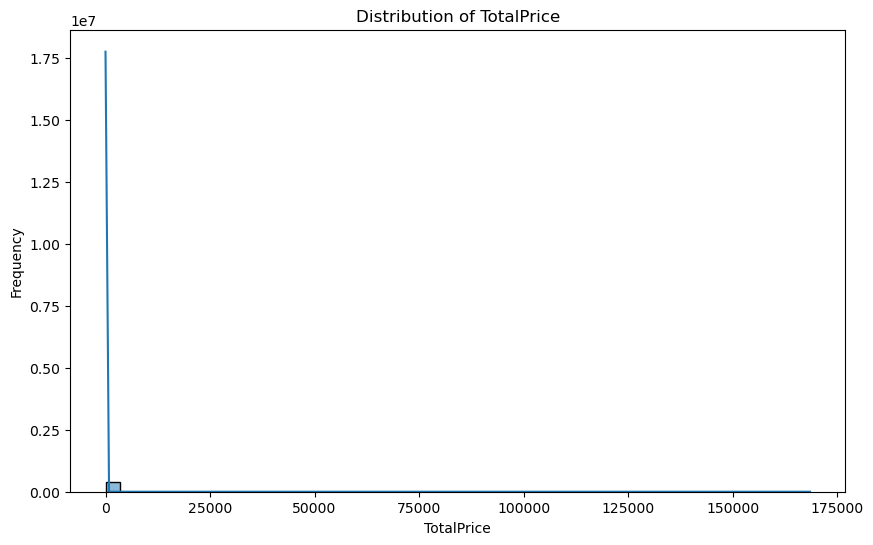

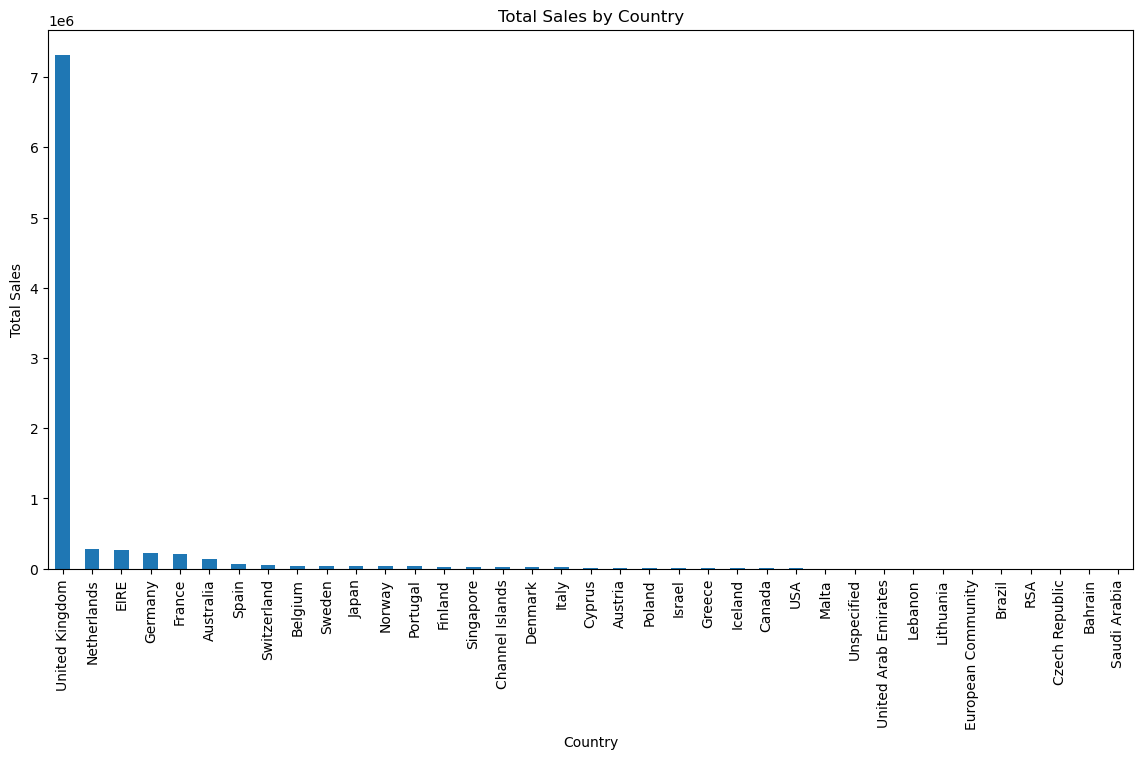

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the cleaned data
file_path = 'C:\\Users\\stann\\OneDrive\\Documents\\datasets\\OnlineRetail.xlsx' 
data = pd.read_csv(file_path)

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Drop rows with missing CustomerID
data.dropna(subset=['CustomerID'], inplace=True)

# Remove entries with negative or zero quantities and prices
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

plt.figure(figsize=(10, 6))
sns.histplot(data['TotalPrice'], bins=50, kde=True)
plt.title('Distribution of TotalPrice')
plt.xlabel('TotalPrice')
plt.ylabel('Frequency')
plt.show()

# Group by Country and sum the TotalPrice
sales_by_country = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Plot total sales by country
plt.figure(figsize=(14, 7))
sales_by_country.plot(kind='bar')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()



C:\Users\stann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


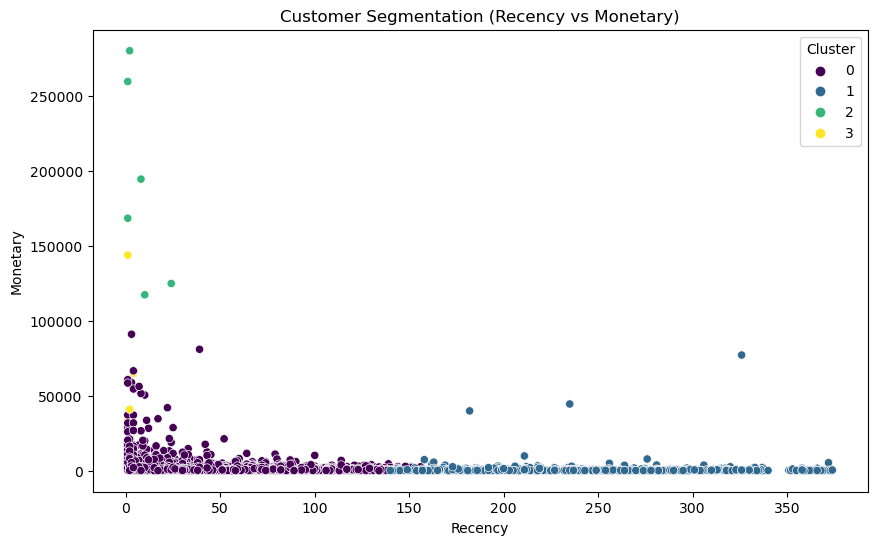

In [20]:
# Calculate RFM values
current_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Customer Segmentation (Recency vs Monetary)')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()
